# JURNAL PCD MODUL II

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

`matplotlib.pylot` digunnakan untuk membuat plot tempat menampilkan gambar dan menampilkan gambar. `numpy` digunakan untuk membuat wadah citra, membuat histogram, menghitung kumulatif dan melakukan interpolasi dalam histogram matching

## input gambar aktivis

baris dibawah digunakan untuk membacanya dalam grayscale dengan `cv`, lalu menampilkan dengan `plt` namun harus di convert ke RGB karena dibaca dengan `cv` sebelumnya.

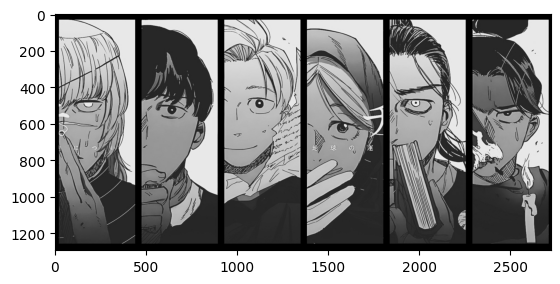

In [147]:
aktivis = cv.imread("assets/aktivis.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(aktivis, cv.COLOR_BGR2RGB), cmap='gray')

## fungsi-fungsi memotong dan menampilkan

In [148]:
def imshow(img, pos):
    plt.subplot(1,6,pos)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
    plt.axis("off")

fungsi di atas digunakan untuk mempersingkat kode di cell selanjutnya. Fungsi ini membuat subplot 1 baris kali 6 kolom dan menampilkan gambarnya yang telah di atur colormapnya

In [149]:
def potong(img, awal, akhir):
    return img[:,awal:akhir]   # img[start_y:end_y,start_x:end_x]

fungsi di atas akan menerima `awal` yaitu sumbu ke-x atau kolom ke berapa awal dari gambar yang akan di potong, `akhir` yaitu akhirnya gambar yang dipotong dan `img` yaitu gambar yang dipotong

## memotong gambar aktivis dan menyimpannya

In [150]:
badeni = potong(aktivis, 0, 453)
albert = potong(aktivis, 453, 908)
rafal = potong(aktivis, 908, 1363)
jolenta = potong(aktivis, 1363, 1816)
oczy = potong(aktivis, 1816, 2269)
draka = potong(aktivis, 2269, 2722)

aktivis memiliki panjang kolom atau sumbu-x sebesar 2722px dan bagian yang dipotong adalah 6. Lalu, karena 2722 mod 6 = 4, maka beberapa gambar akan memanjang 453px dan beberapa lainnya dilebihkan sedikit.

## melihat hasil potongan

cell dibawah dibuat untuk melihat hasil potangan dan melihat juga properti `gambar.shape` setiap potongan untuk nantinya di atur dalam proses penataan ulang.

albert: (1294, 455)
draka: (1294, 453)
jolenta: (1294, 453)
badeni: (1294, 453)
oczy: (1294, 453)
rafal: (1294, 455)


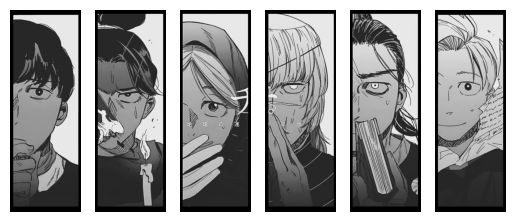

In [151]:
imshow(albert, 1)
print(f"albert: {albert.shape}")
imshow(draka, 2)
print(f"draka: {draka.shape}")
imshow(jolenta, 3)
print(f"jolenta: {jolenta.shape}")
imshow(badeni, 4)
print(f"badeni: {badeni.shape}")
imshow(oczy, 5)
print(f"oczy: {oczy.shape}")
imshow(rafal, 6)
print(f"rafal: {rafal.shape}")

## menata ulang potongan-potongan citra menjadi satu

cell dibawah akan membuat terlebih dahulu wadah citranya dengan bantuan `np.zeros`. Lalu `aktivisCombined` akan dimasukkan kedalamnya mulai dengan rentang `aktivisCombined[start_y:end_y,start_x:end_x]`, potongan-potongan gambar dan memastikan rentang tersebut tidak lebih besar maupu lebih kecil dari rentang ukuran citra nya dalam sumbu-x atau kolomnya.

albert: (1294, 455)
draka: (1294, 453)
jolenta: (1294, 453)
badeni: (1294, 453)
oczy: (1294, 453)
rafal: (1294, 455)
aktivisCombined: (1294, 2722)


(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

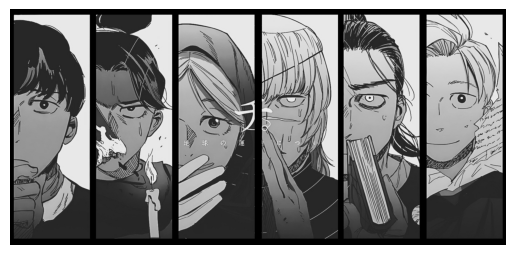

In [152]:
aktivisCombined = np.zeros((aktivis.shape[0], aktivis.shape[1]), dtype=np.uint8)

print(f"albert: {albert.shape}")
print(f"draka: {draka.shape}")
print(f"jolenta: {jolenta.shape}")
print(f"badeni: {badeni.shape}")
print(f"oczy: {oczy.shape}")
print(f"rafal: {rafal.shape}")
print(f"aktivisCombined: {aktivisCombined.shape}")

aktivisCombined[:,0:455] = albert
aktivisCombined[:,455:908] = draka
aktivisCombined[:,908:1361] = jolenta
aktivisCombined[:,1361:1814] = badeni
aktivisCombined[:,1814:2267] = oczy 
aktivisCombined[:,2267:2722] = rafal 

plt.imshow(cv.cvtColor(aktivisCombined, cv.COLOR_BGR2RGB), cmap='gray')
plt.axis("off")

# Melakukan Ekualisasi Histogram Citra

singkat cerita, _cell_ di bawah akan membuat figure dengan panjang 16 dan tinggi 10, subplot berjumlah 4, menghasilkan gambar ekualisasi dengan  `cv.equalizeHist(img)`, menampilkan gambar asli dan gambar setelah ekualisasi histogram pada index 1 dan 2,  dan menampilkan histogram mereka masing-masing pada index 3 dan 4 dengan `plt.hist()`

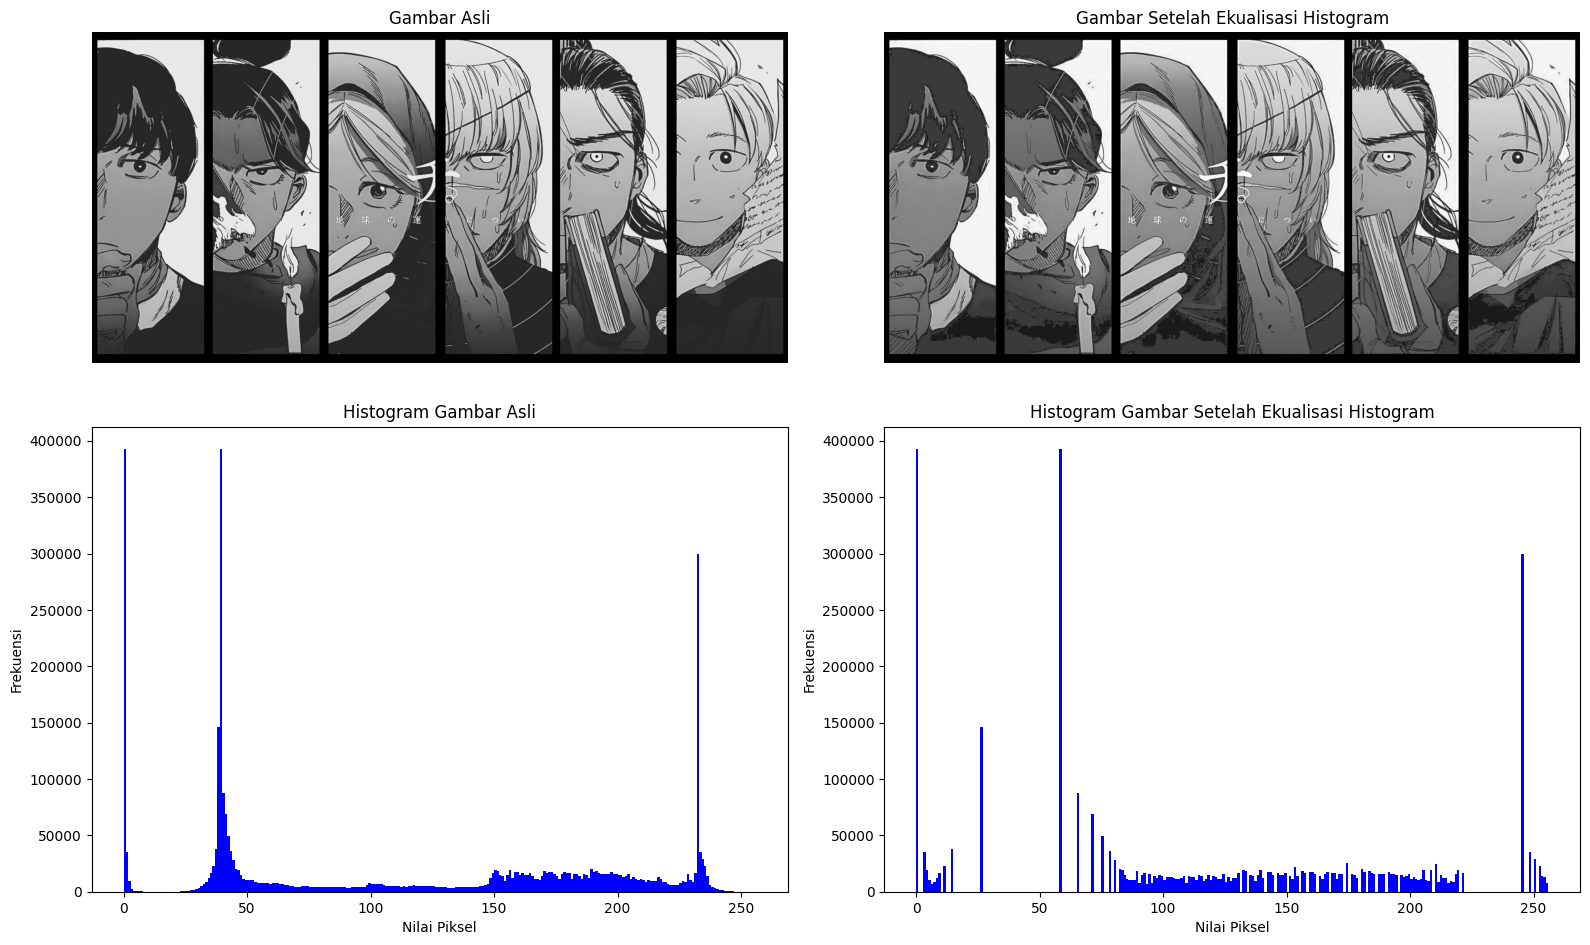

In [153]:
# Menampilkan gambar asli
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(aktivisCombined, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Melakukan ekualisasi histogram
gambar_equalized = cv.equalizeHist(aktivisCombined)

# Menampilkan gambar setelah ekualisasi histogram
plt.subplot(2, 2,2)
plt.imshow(cv.cvtColor(gambar_equalized, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Gambar Setelah Ekualisasi Histogram')
plt.axis('off')

# Menampilkan histogram dari gambar asli
plt.subplot(2, 2, 3)
plt.hist(aktivisCombined.ravel(), bins=256, range=(0, 256), color='b')
plt.title('Histogram Gambar Asli')
plt.xlabel('Nilai Piksel')
plt.ylabel ( 'Frekuensi' )


# Menampilkan histogram dari gambar setelah ekualisasi histogram
plt.subplot(2, 2, 4)
plt.hist(gambar_equalized.ravel(), bins=256, range=(0, 256), color='b')
plt.title('Histogram Gambar Setelah Ekualisasi Histogram')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

_cell_ dibawah ini akan memperlihatkan jika dibandingkan secara menumpuk

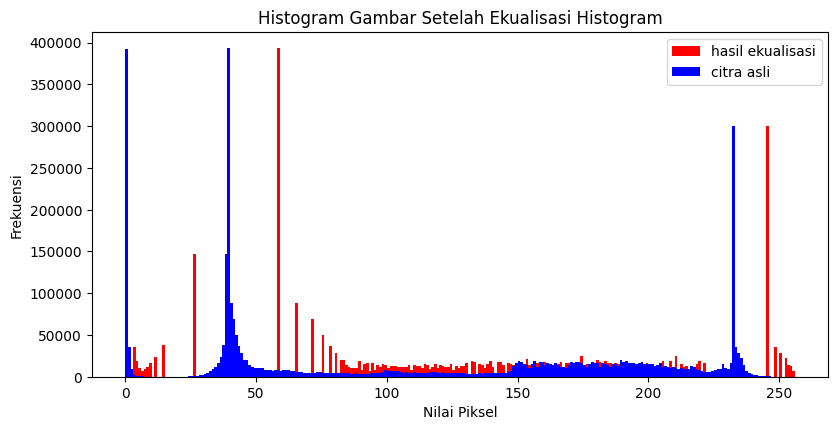

In [154]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.hist(gambar_equalized.ravel(), bins=256, range=(0, 256), color='r', label="hasil ekualisasi")
plt.hist(aktivisCombined.ravel(), bins=256, range=(0, 256), color='b', label="citra asli")
plt.title('Histogram Gambar Setelah Ekualisasi Histogram')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.legend()
plt.show()

## Hitung CDF

In [155]:
inputCount, binsImageInput = np.histogram(gambar_equalized, bins=256, range=(0, 255)) #gambar asli
inputPDF = inputCount / sum(inputCount)
cdfImageInput = np.cumsum(inputPDF)

untuk mengitung CDF diperlukan PDF-nya yang dapat dicari dengan cell diatas dengan bantuan `np.histogram`

## Mengecek CDF gambar input

_cell_ dibawah akan memetakan `binsImageInput[1:]` karena totalnya adalah 257, sementara `cdfImageInput` totalnya 256, kedalam plot.

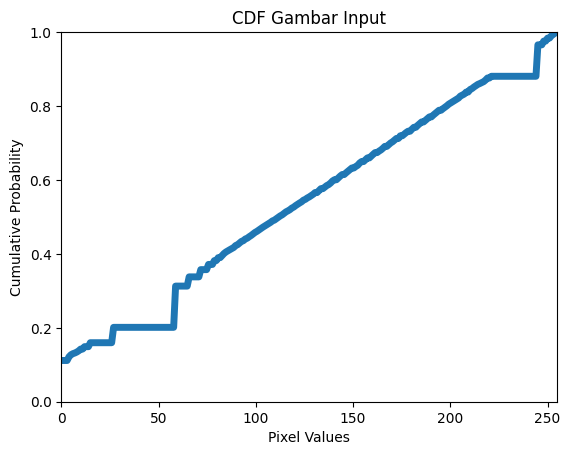

In [156]:
plt.plot(binsImageInput[1:], cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.title("CDF Gambar Input")
plt.show()

### mengecek apakah terdapat bin yang kosong

In [157]:
# check the first and last bins and probability
print(f"First bins: {binsImageInput[0]}, Cumulative Probability: {cdfImageInput[0]:.5f}")
print(f"Last bins: {binsImageInput[-1]}, Cumulative Probability: {cdfImageInput[-1]:.5f}")

First bins: 0.0, Cumulative Probability: 0.11157
Last bins: 255.0, Cumulative Probability: 1.00000


_cell_ di atas akan mengecek bin pertama dan terakhir untuk di-padding, namun dalam kasus ini bin semuanya terpenuhi.

## mengambil nilai CDF gambar input

_cell_ dibawah akan memasukkan nilai CDF dengan padding jika diperlukan, dan melihatnya.

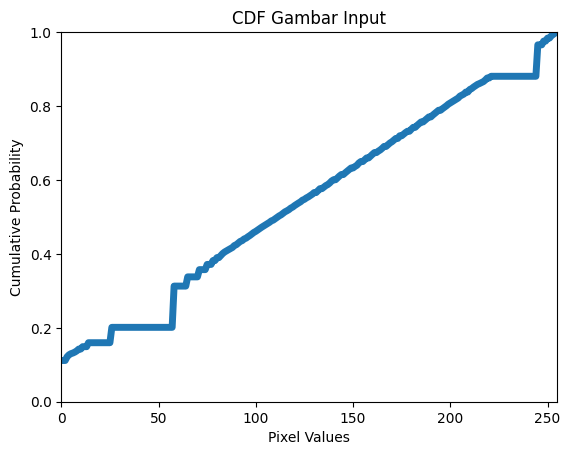

In [158]:
# pad the begining and ending pixel values
cdfImageInput = np.insert(cdfImageInput, 0, [0]*int(binsImageInput[0]))
cdfImageInput = np.append(cdfImageInput, [1]*(255-int(binsImageInput[-1])))

plt.plot(cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.title("CDF Gambar Input")
plt.show()

## hitung CDF gambar propaganda

In [159]:
propaganda = cv.imread("assets/propaganda.jpg", cv.IMREAD_GRAYSCALE)
templateCount, binsImageTemplate = np.histogram(propaganda, bins=256, range=(0, 255)) #gambar target
templatePDF = templateCount / sum(templateCount)
cdfImageTemplate = np.cumsum(templatePDF)

_cell_ ini akan membaca terlebih dahulu dengan `cv.imread` seperti pada gambar aktivis, lalu menghitung CDF-nya.

## simpan dan tampilkan CDF gambar propaganda

_cell_ ini akan menambah padding bernilai 0 jika bin awal terletak lebih dari 0 dan paddiG bernilai 1 jika bin akhir terletak kurang dari 255. Menampilkan plot-nya

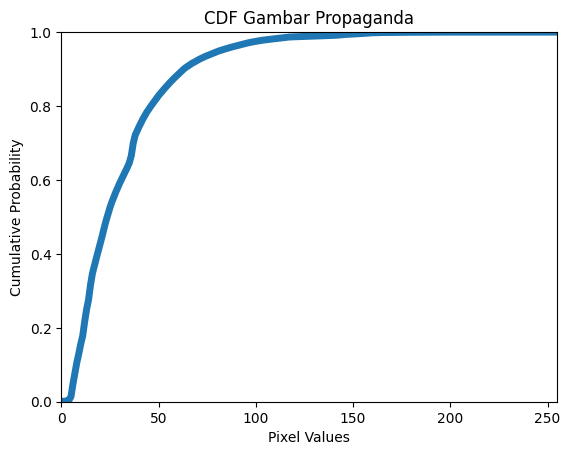

In [160]:
# pad the begining and ending pixel values
cdfImageTemplate = np.insert(cdfImageTemplate, 0, [0]*int(binsImageTemplate[0]))
cdfImageTemplate = np.append(cdfImageTemplate, [1]*(255-int(binsImageTemplate[-1])))

plt.plot(cdfImageTemplate, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.title("CDF Gambar Propaganda")
plt.show()

### membandingkan kedua CDF

_cell_ ini akan membandingkan kedua CDF, dapat dilihat CDF target memiliki delta kenaikan kumulatif yang besar pada pixel rendah (dibawah 60), jadi dari sini dapat diperkirakan bahwa citranya nanti akan menjadi citra yang memiliki pixel yang lebih gelap   

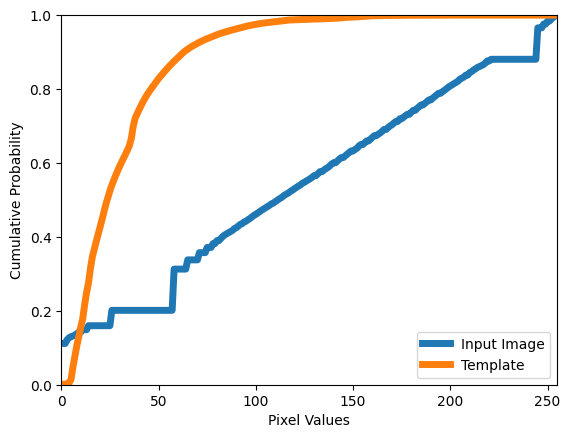

In [161]:
plt.plot(cdfImageInput, linewidth=5, label='Input Image')
plt.plot(cdfImageTemplate, linewidth=5, label='Template')
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

## Histogram Matching

membuat wadah pixel yang menyimpan 8-bit warna dengan `np.arange`

In [162]:
pixels = np.arange(256)
pixels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

_cell_ dibawah ini akan melakukan interpolasi histogram citra target dengan input, dan menyimpan hasilnya sebagi pixel baru.

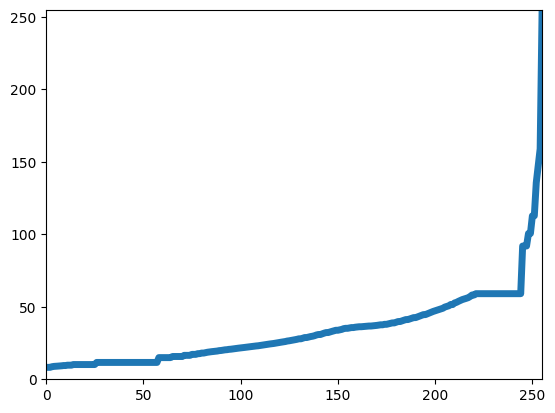

In [163]:
new_pixels = np.interp(cdfImageInput, cdfImageTemplate, pixels)
plt.plot(new_pixels, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

## memetakan hasil interpolasi dengan citra input

In [164]:
imageOut = (np.reshape(new_pixels[gambar_equalized.ravel()],gambar_equalized.shape)).astype(np.uint8)

_cell_ di atas ini akan memetakan hasil dari interpolasi ke dalam gambar input, dengan terlebih dahulu mengubah gambar input menjadi 1D array dengan `.ravel()`, lalu setelah dipetakan akan di bentuk ulang menjadi 2D array dengan `np.reshape`

## menampilkan citra hasil spesifikasi

_cell_ dibawah akan membuat figure dengan pxt, 20x10 dan menampilkan citra asli, citra target spesifikasi, dan citra hasil spesifikasi.

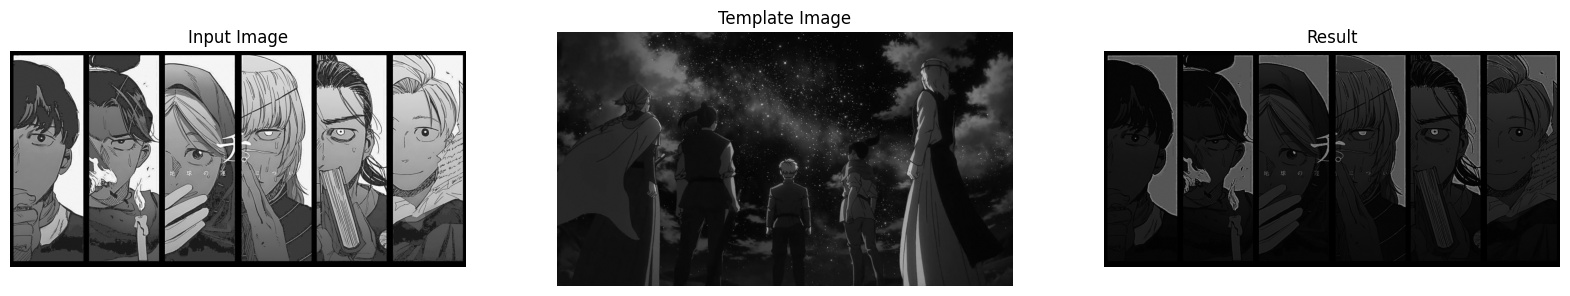

In [165]:
# Preview the result
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.title('Input Image')
plt.imshow(gambar_equalized, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Template Image')
plt.imshow(propaganda, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Result') 
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()